In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Span, RangeSlider
from bokeh.layouts import column
from bokeh.palettes import Category10
from mpl_toolkits.mplot3d import Axes3D
import dash
from dash import dcc, html
import plotly.graph_objs as go
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact, pearsonr, spearmanr

In [4]:
df=pd.read_csv("Urban Air Quality and Health Impact Dataset.csv")
print("Displaying first 5 rows:",df.head())

Displaying first 5 rows:      datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0  2024-09-07   1.725692e+09    106.1     91.0  98.5         104.0   
1  2024-09-08   1.725779e+09    103.9     87.0  95.4         100.5   
2  2024-09-09   1.725865e+09    105.0     83.9  94.7          99.9   
3  2024-09-10   1.725952e+09    106.1     81.2  93.9         100.6   
4  2024-09-11   1.726038e+09    106.1     82.1  94.0         101.0   

   feelslikemin  feelslike   dew  humidity  ...     City  Temp_Range  \
0          88.1       95.9  51.5      21.0  ...  Phoenix        15.1   
1          84.7       92.3  48.7      21.5  ...  Phoenix        16.9   
2          81.6       90.6  41.7      16.9  ...  Phoenix        21.1   
3          79.5       89.8  39.1      15.7  ...  Phoenix        24.9   
4          80.0       90.0  40.1      15.9  ...  Phoenix        24.0   

   Heat_Index Severity_Score  Condition_Code  Month  Season  Day_of_Week  \
0   95.918703         4.4300             NaN 

In [30]:
print("Displaying the column names and datatypes:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

In [31]:
print(df.isnull().sum())

datetime               0
datetimeEpoch          0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           622
snow                   0
snowdepth             71
windgust               0
windspeed              0
winddir                0
pressure               0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
stations             933
source                 0
City                   0
Temp_Range             0
Heat_Index             0
Severity_Score         0


In [32]:
print("Basic Statistics:",df.describe())

Basic Statistics:        datetimeEpoch      tempmax      tempmin         temp  feelslikemax  \
count   1.000000e+03  1000.000000  1000.000000  1000.000000   1000.000000   
mean    1.726284e+09    85.106961    68.641638    76.115967     85.195384   
std     3.745834e+05     9.524231     8.474102     8.722070      9.496951   
min     1.725624e+09    62.035432    49.108218    55.548415     62.206413   
25%     1.725948e+09    78.661118    62.678245    69.102499     78.485332   
50%     1.726285e+09    84.322847    67.702405    75.222751     84.284077   
75%     1.726616e+09    91.653987    75.585109    82.396698     93.757026   
max     1.727021e+09   107.797400    91.635546    99.851684    105.060170   

       feelslikemin    feelslike          dew     humidity       precip  ...  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      68.547548    76.323286    57.267120    56.782281     0.032135  ...   
std        8.365809     8.621361     9.161517   

In [33]:
print("Specific columns:",df[['temp','Health_Risk_Score']].describe())

Specific columns:               temp  Health_Risk_Score
count  1000.000000        1000.000000
mean     76.115967           9.729103
std       8.722070           0.679728
min      55.548415           8.492431
25%      69.102499           9.195244
50%      75.222751           9.546156
75%      82.396698          10.242523
max      99.851684          11.485725


In [34]:
print("Unique Conditions:",df['conditions'].value_counts())
print("Unique City:",df['City'].value_counts())

print("Day wise health risk:",df.groupby('Day_of_Week')['Health_Risk_Score'])
print("Seasonal Trends:",df.groupby('Season')['Health_Risk_Score'].agg(['mean','median','std']))

Unique Conditions: conditions
Clear                     569
Partially cloudy          363
Rain, Partially cloudy     55
Overcast                   13
Name: count, dtype: int64
Unique City: City
Chicago          131
New York City    113
Phoenix          106
Dallas           106
Philadelphia      94
Los Angeles       93
San Diego         93
San Jose          90
Houston           89
San Antonio       85
Name: count, dtype: int64
Day wise health risk: <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001FBF55E0230>
Seasonal Trends:             mean    median       std
Season                              
Fall    9.729103  9.546156  0.679728


                   datetimeEpoch   tempmax   tempmin      temp  feelslikemax  \
datetimeEpoch           1.000000 -0.009753  0.152861  0.045901     -0.015768   
tempmax                -0.009753  1.000000  0.808405  0.936353      0.952111   
tempmin                 0.152861  0.808405  1.000000  0.944321      0.820330   
temp                    0.045901  0.936353  0.944321  1.000000      0.920431   
feelslikemax           -0.015768  0.952111  0.820330  0.920431      1.000000   
feelslikemin            0.164148  0.801754  0.988296  0.939750      0.821445   
feelslike               0.055531  0.912584  0.939621  0.976463      0.942921   
dew                     0.046728  0.045593  0.258251  0.150877      0.262477   
humidity                0.000268 -0.609694 -0.396124 -0.538453     -0.418409   
precip                  0.053142 -0.047861  0.129018  0.041237      0.038671   
precipprob              0.116485  0.007802  0.260121  0.149406      0.137801   
precipcover            -0.077928  0.0109

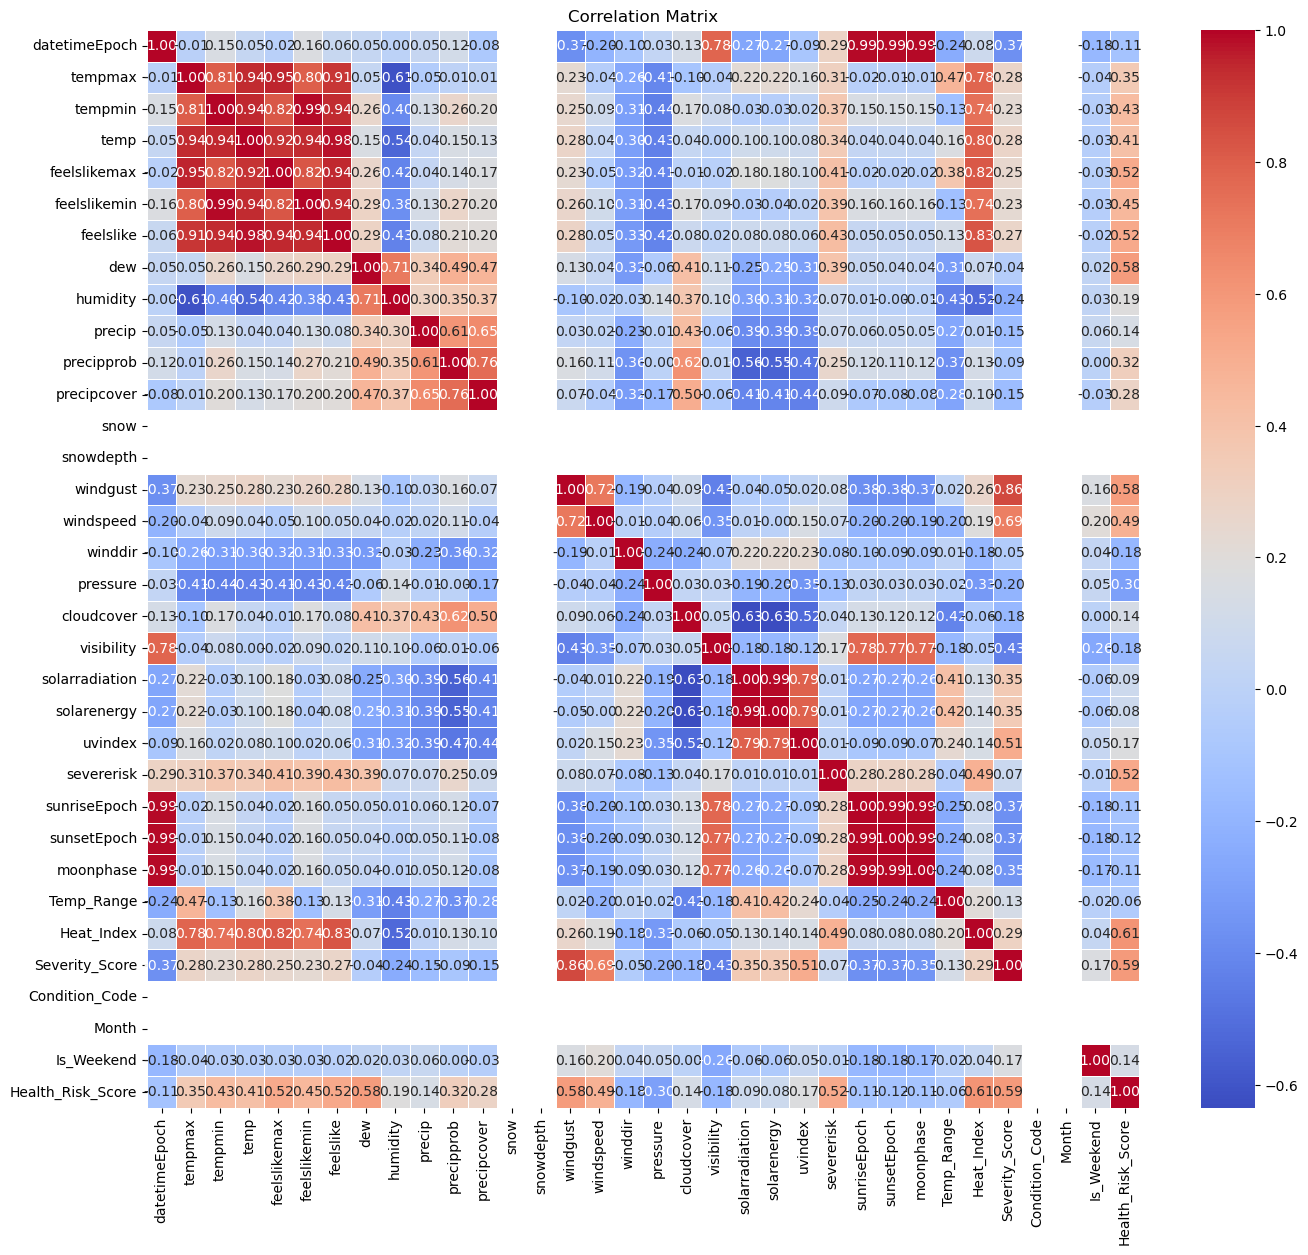

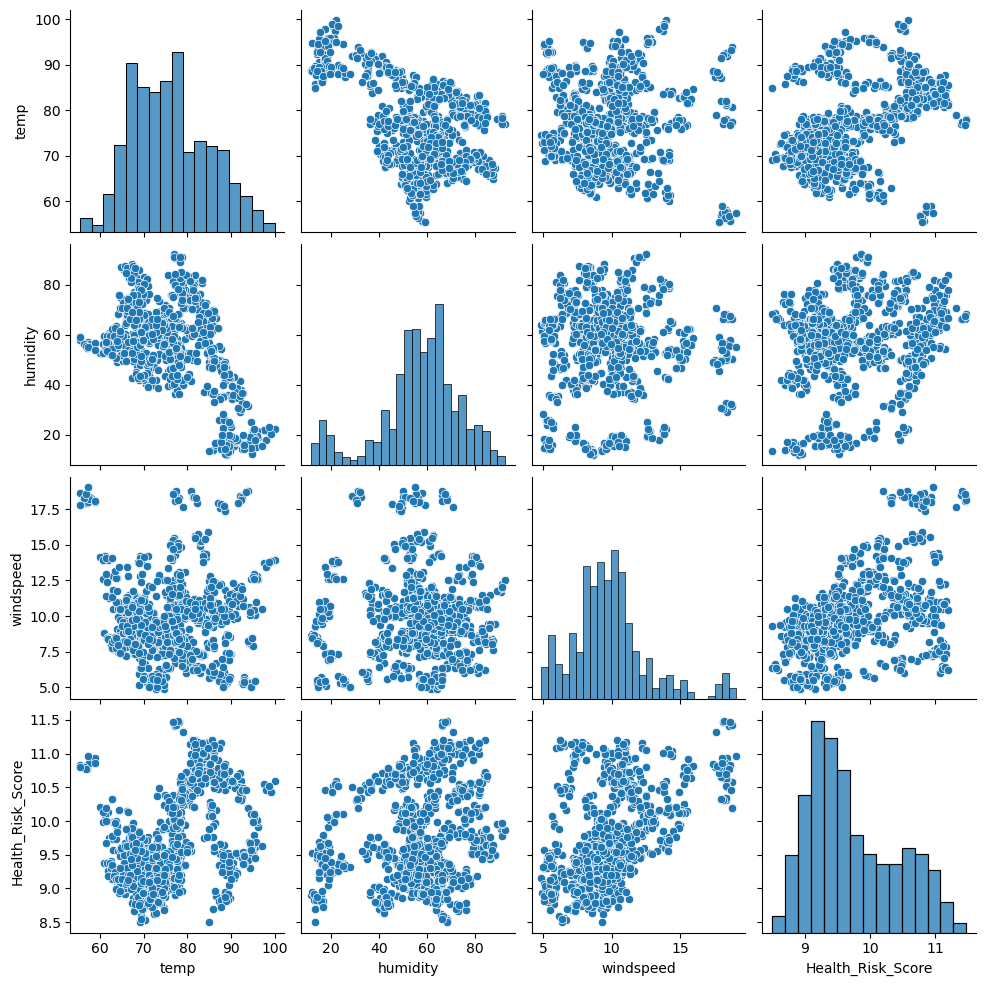

In [35]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix)

plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[['temp','humidity','windspeed','Health_Risk_Score']])
plt.show()

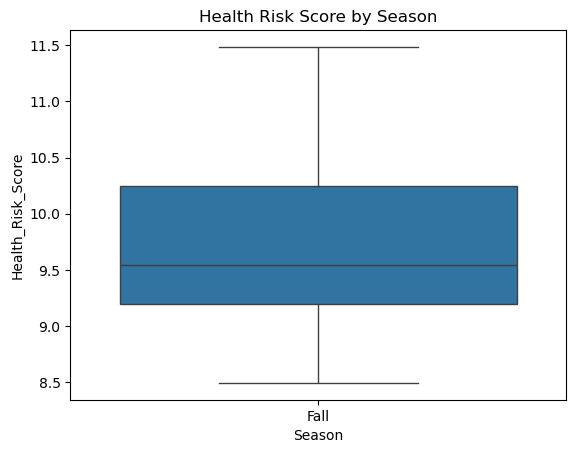

In [36]:
sns.boxplot(x='Season',y='Health_Risk_Score',data=df)
plt.title("Health Risk Score by Season")
plt.show()

In [37]:
#Univariate Analysis

print(df[['temp','Health_Risk_Score']].describe())

print("Mean:",df['Health_Risk_Score'].mean())
print("Median:",df['Health_Risk_Score'].median())
print("Variance:",df['Health_Risk_Score'].var())
print("Standard Deviation:",df['Health_Risk_Score'].std())
print("Skewness:", df['Health_Risk_Score'].skew())
print("Kurtosis:", df['Health_Risk_Score'].kurt())

              temp  Health_Risk_Score
count  1000.000000        1000.000000
mean     76.115967           9.729103
std       8.722070           0.679728
min      55.548415           8.492431
25%      69.102499           9.195244
50%      75.222751           9.546156
75%      82.396698          10.242523
max      99.851684          11.485725
Mean: 9.72910290996544
Median: 9.546156421053258
Variance: 0.46203065013880507
Standard Deviation: 0.6797283649655979
Skewness: 0.5735679217098809
Kurtosis: -0.725509802061242


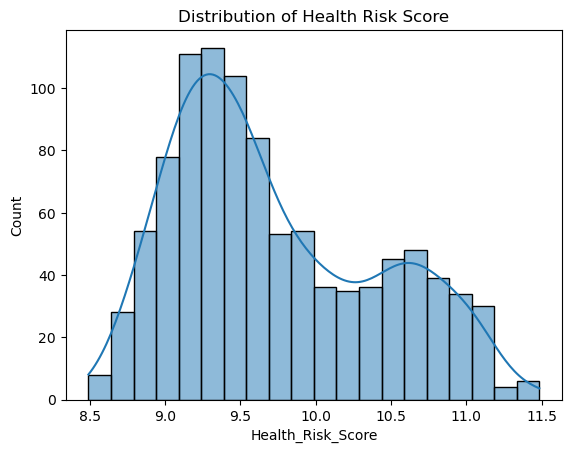

In [38]:
sns.histplot(df['Health_Risk_Score'], kde=True, bins=20)
plt.title("Distribution of Health Risk Score")
plt.show()

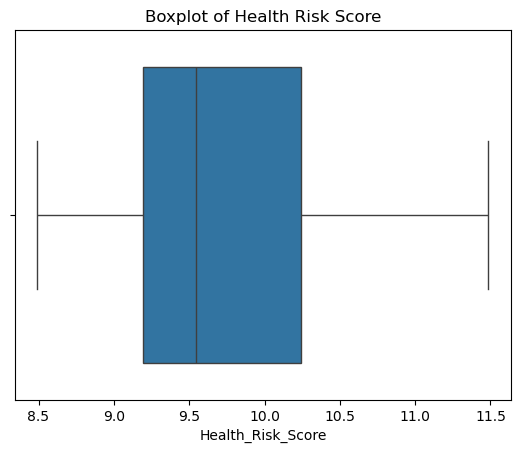

In [39]:
sns.boxplot(x=df['Health_Risk_Score'])
plt.title("Boxplot of Health Risk Score")
plt.show()

City
Chicago          131
New York City    113
Phoenix          106
Dallas           106
Philadelphia      94
Los Angeles       93
San Diego         93
San Jose          90
Houston           89
San Antonio       85
Name: count, dtype: int64
conditions
Clear                     56.9
Partially cloudy          36.3
Rain, Partially cloudy     5.5
Overcast                   1.3
Name: proportion, dtype: float64


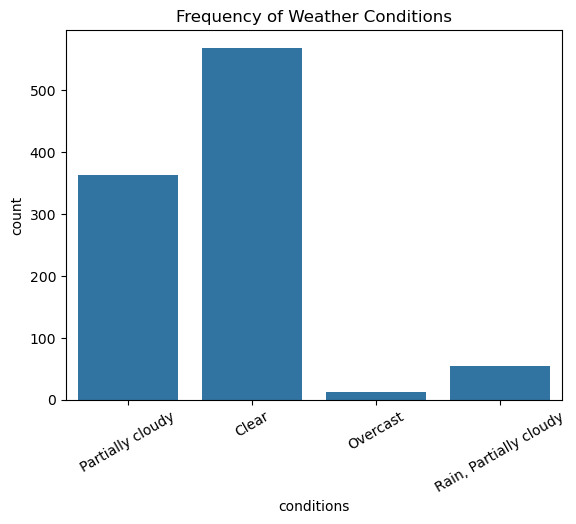

In [40]:
print(df['City'].value_counts())
print(df['conditions'].value_counts(normalize=True) * 100)

sns.countplot(x='conditions', data=df)
plt.xticks(rotation=30)
plt.title("Frequency of Weather Conditions")
plt.show()

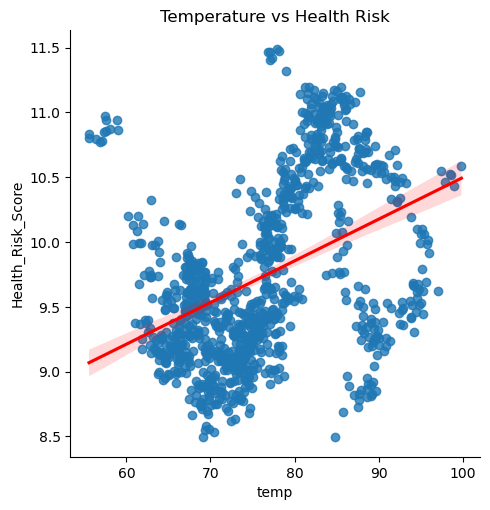

In [41]:
#Bivariate Analysis
#Linear Regression

sns.lmplot(x='temp',y='Health_Risk_Score',data=df,line_kws={'color':'red'})
plt.title('Temperature vs Health Risk')
plt.show()

In [42]:
X=df[['temp']]
y=df['Health_Risk_Score']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

print("R-Squared Test:", r2_score(y_test, y_pred))
print("R-Squared Train:",r2_score(y_train,y_train_pred))
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:",mean_squared_error(y_test,y_pred))

R-Squared Test: 0.12199298655454571
R-Squared Train: 0.1756279081117288
Slope: 0.032773727693880046
Intercept: 7.252840982683353
MSE: 0.3493764986740831


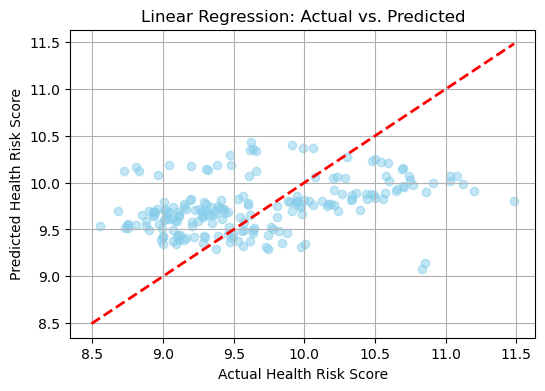

In [43]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) 
plt.xlabel('Actual Health Risk Score')
plt.ylabel('Predicted Health Risk Score')
plt.title('Linear Regression: Actual vs. Predicted')
plt.grid(True)
plt.show()

Slope: 0.07307272151199821
Intercept: -5.536660691556387
Accuracy: 0.76
Confusion Matrix: [[82 22]
 [26 70]]
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.79      0.77       104
           1       0.76      0.73      0.74        96

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



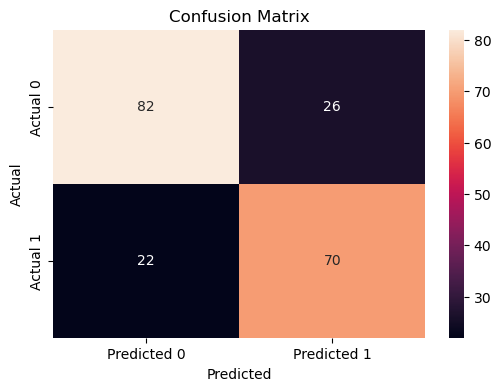

In [44]:
#Logisitic Regression
df['High_Risk'] = (df['Health_Risk_Score'] > df['Health_Risk_Score'].median()).astype(int)
X = df[['temp']]
y = df['High_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

print("Slope:",model.coef_[0][0])
print("Intercept:", model.intercept_[0])
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_pred, y_test),annot=True, xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

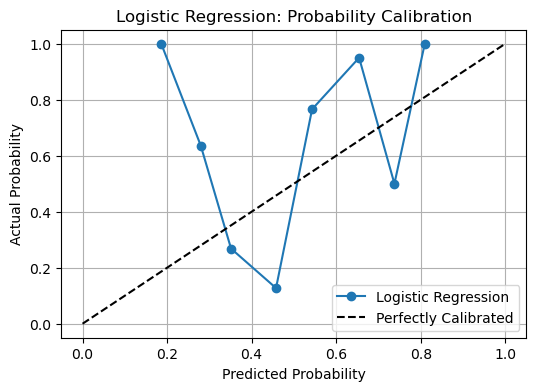

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--k', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Logistic Regression: Probability Calibration')
plt.legend()
plt.grid(True)
plt.show()

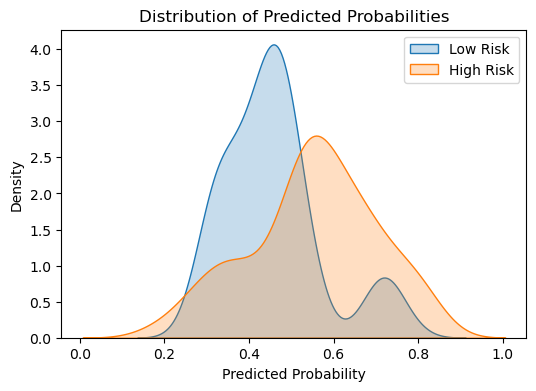

In [46]:
plt.figure(figsize=(6,4))
sns.kdeplot(y_prob[y_test==0], label='Low Risk', fill=True)
sns.kdeplot(y_prob[y_test==1], label='High Risk', fill=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

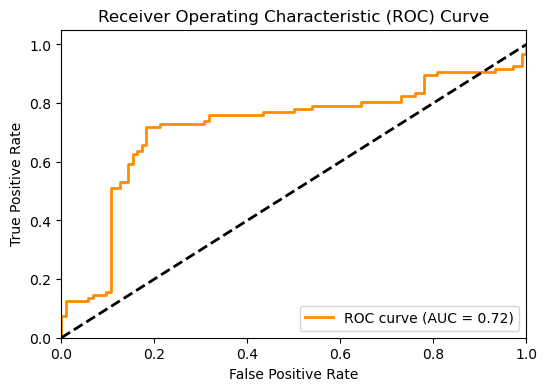

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
#Outlier detection and removal
numeric_cols = ['temp', 'humidity', 'windspeed', 'pressure', 'Health_Risk_Score']

def remove_outliers_zscore(df, columns, threshold=3):
    df_clean = df.copy()
    for col in columns:
        z_scores = np.abs(stats.zscore(df_clean[col]))
        df_clean = df_clean[z_scores < threshold]
    return df_clean

df_clean = remove_outliers_zscore(df, numeric_cols)

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)} ({((len(df)-len(df_clean))/len(df))*100:.2f}%)")

Original shape: (1000, 47)
Cleaned shape: (977, 47)
Rows removed: 23 (2.30%)


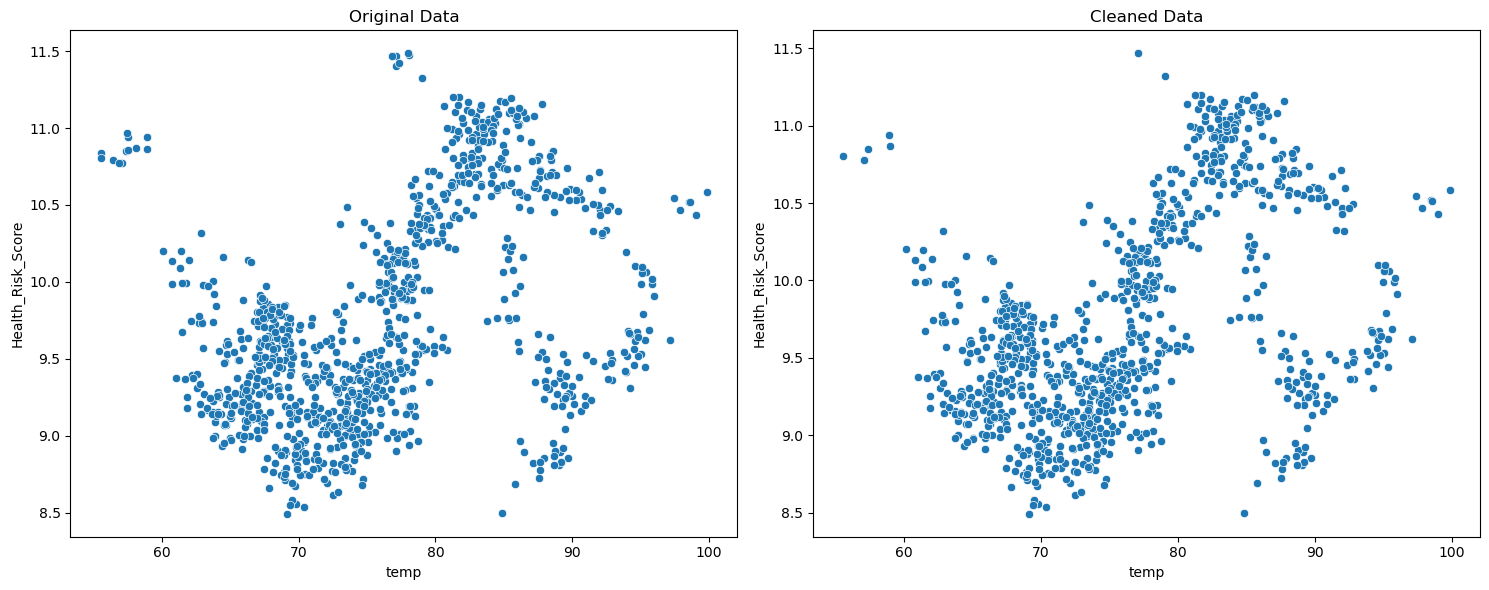

Original Data Statistics
              temp     humidity    windspeed     pressure  Health_Risk_Score
count  1000.000000  1000.000000  1000.000000  1000.000000        1000.000000
mean     76.115967    56.782281     9.871120  1014.030099           9.729103
std       8.722070    16.708667     2.753853     5.567010           0.679728
min      55.548415    11.752135     4.885928  1000.448061           8.492431
25%      69.102499    49.982029     8.261997  1010.100000           9.195244
50%      75.222751    58.486182     9.587932  1012.529215           9.546156
75%      82.396698    66.560400    10.852199  1018.198525          10.242523
max      99.851684    92.459293    19.023118  1030.664607          11.485725

Cleaned Data Statistics
             temp    humidity   windspeed     pressure  Health_Risk_Score
count  977.000000  977.000000  977.000000   977.000000         977.000000
mean    76.127663   56.898411    9.669059  1014.018538           9.703505
std      8.582264   16.782650    2.

In [19]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='Health_Risk_Score', data=df)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.scatterplot(x='temp', y='Health_Risk_Score', data=df_clean)
plt.title('Cleaned Data')

plt.tight_layout()
plt.show()

# Original stats
print("Original Data Statistics")
print(df[numeric_cols].describe())

# Cleaned stats
print("\nCleaned Data Statistics")
print(df_clean[numeric_cols].describe())

In [29]:
#Chi-Square Test
contingency = pd.crosstab(df['conditions'], df['Health_Risk_Score'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"χ² = {chi2:.2f}, p = {p:.4f}")

#Fisher's Exact Test
odds_ratio, p = fisher_exact(contingency.iloc[:2,:2]) 
print(f"OR = {odds_ratio:.2f}, p = {p:.4f}")

#Pearson Correlation (Linear)
corr, p = pearsonr(df['temp'], df['Health_Risk_Score'])
print(f"Pearson r: {corr:.2f}, p-value: {p:.4f}")

#Spearman Correlation (Monotonic)
corr, p = spearmanr(df['humidity'], df['Health_Risk_Score'])
print(f"Spearman ρ: {corr:.2f}, p-value: {p:.4f}")

χ² = 3000.00, p = 0.4811
OR = 0.00, p = 1.0000
Pearson r: 0.41, p-value: 0.0000
Spearman ρ: 0.16, p-value: 0.0000


Explained Variance Ratio: [0.44230399 0.24943247]
Principal Components:
 [[ 0.66818088 -0.56020205  0.07100887 -0.48442308]
 [-0.05381576  0.10563781  0.99163501 -0.05103452]]


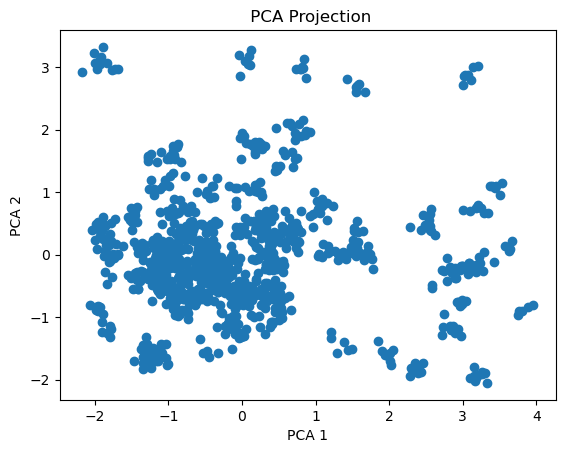

In [49]:
#Multivariate Analysis
#PCA
X=df[['temp','humidity','windspeed','pressure']]

scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components:\n", pca.components_)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(' PCA Projection')
plt.show()

In [50]:
X = df[['temp', 'humidity', 'windspeed', 'pressure', 'Health_Risk_Score']] 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

cov_matrix = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]

top_components = eigen_vecs[:, :2]

X_pca = np.dot(X_std, top_components)

explained_var = eigen_vals / np.sum(eigen_vals)
print(f"Explained Variance (PC1, PC2): {explained_var[:2]}")

Explained Variance (PC1, PC2): [0.39468703 0.28568186]


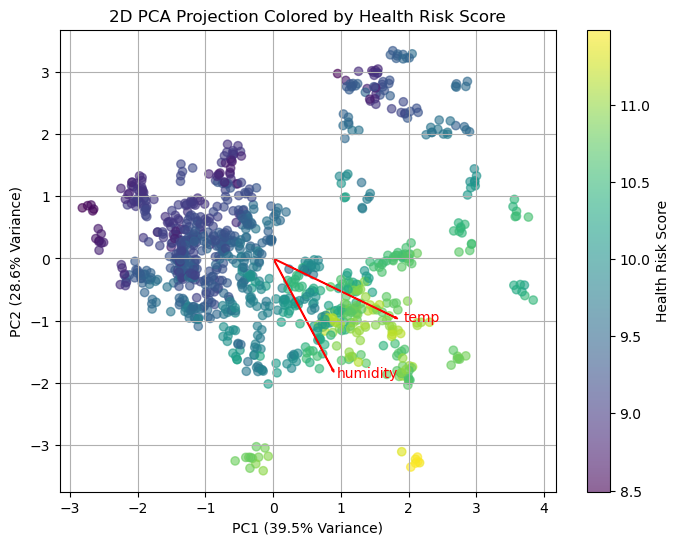

In [51]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Health_Risk_Score'], cmap='viridis', alpha=0.6)

plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}% Variance)')
plt.title('2D PCA Projection Colored by Health Risk Score')
plt.colorbar(scatter, label='Health Risk Score')

# Draw principal component directions as arrows
for i, (x, y) in enumerate(zip(top_components[0], top_components[1])):
    plt.arrow(0, 0, x*3, y*3, color='r', width=0.01)
    plt.text(x*3.2, y*3.2, X.columns[i], color='r')

plt.grid(True)
plt.show()

In [52]:
#Conditional Probability
df['High_Risk'] = (df['Health_Risk_Score'] > df['Health_Risk_Score'].median()).astype(int)
median_temp=df['temp'].median()
high_temp=df[df['temp']>median_temp]
high_risk_given_temp=high_temp['High_Risk'].mean()
print(f"P(High_Risk = 1 | temp > median): {high_risk_given_temp:.2f}")

P(High_Risk = 1 | temp > median): 0.74


Accuracy: 0.82
Confusion Matrix: [[142   9]
 [ 45 104]]
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.94      0.84       151
           1       0.92      0.70      0.79       149

    accuracy                           0.82       300
   macro avg       0.84      0.82      0.82       300
weighted avg       0.84      0.82      0.82       300



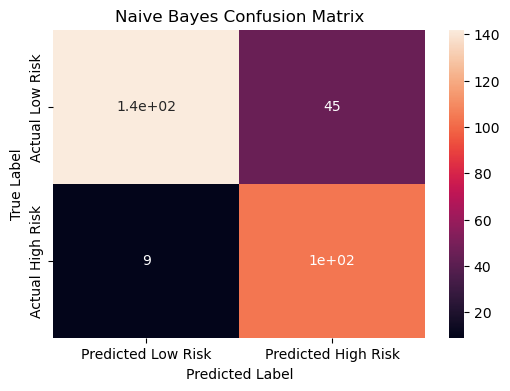

In [53]:
X = df[['temp', 'humidity', 'windspeed']]
y = df['High_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_pred, y_test),annot=True, xticklabels=['Predicted Low Risk','Predicted High Risk'],yticklabels=['Actual Low Risk','Actual High Risk'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.91
AUC-ROC: 0.9755322458775946
Confusion Matrix: [[146   5]
 [ 22 127]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.97      0.92       151
           1       0.96      0.85      0.90       149

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



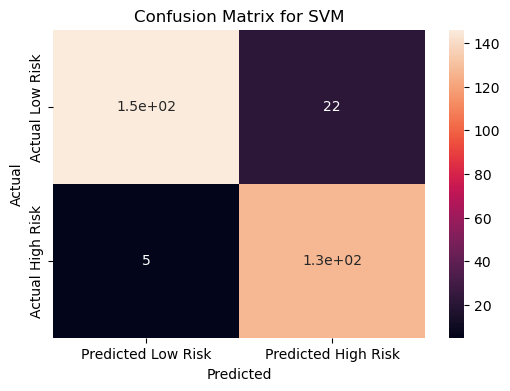

In [54]:
df['High_Risk'] = (df['Health_Risk_Score'] > df['Health_Risk_Score'].median()).astype(int)
X = df[['temp', 'humidity', 'windspeed', 'pressure']]
y = df['High_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1] 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, xticklabels=['Predicted Low Risk','Predicted High Risk'], yticklabels=['Actual Low Risk','Actual High Risk'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

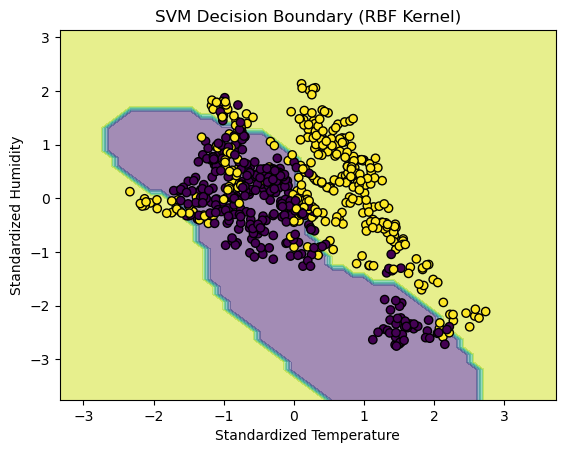

In [55]:
X_vis = X_train_scaled[:, :2]
svm_vis = SVC(kernel='rbf', C=10, gamma='scale')
svm_vis.fit(X_vis, y_train)

DecisionBoundaryDisplay.from_estimator(
svm_vis, X_vis, response_method="predict",alpha=0.5, grid_resolution=50)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Standardized Temperature')
plt.ylabel('Standardized Humidity')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()

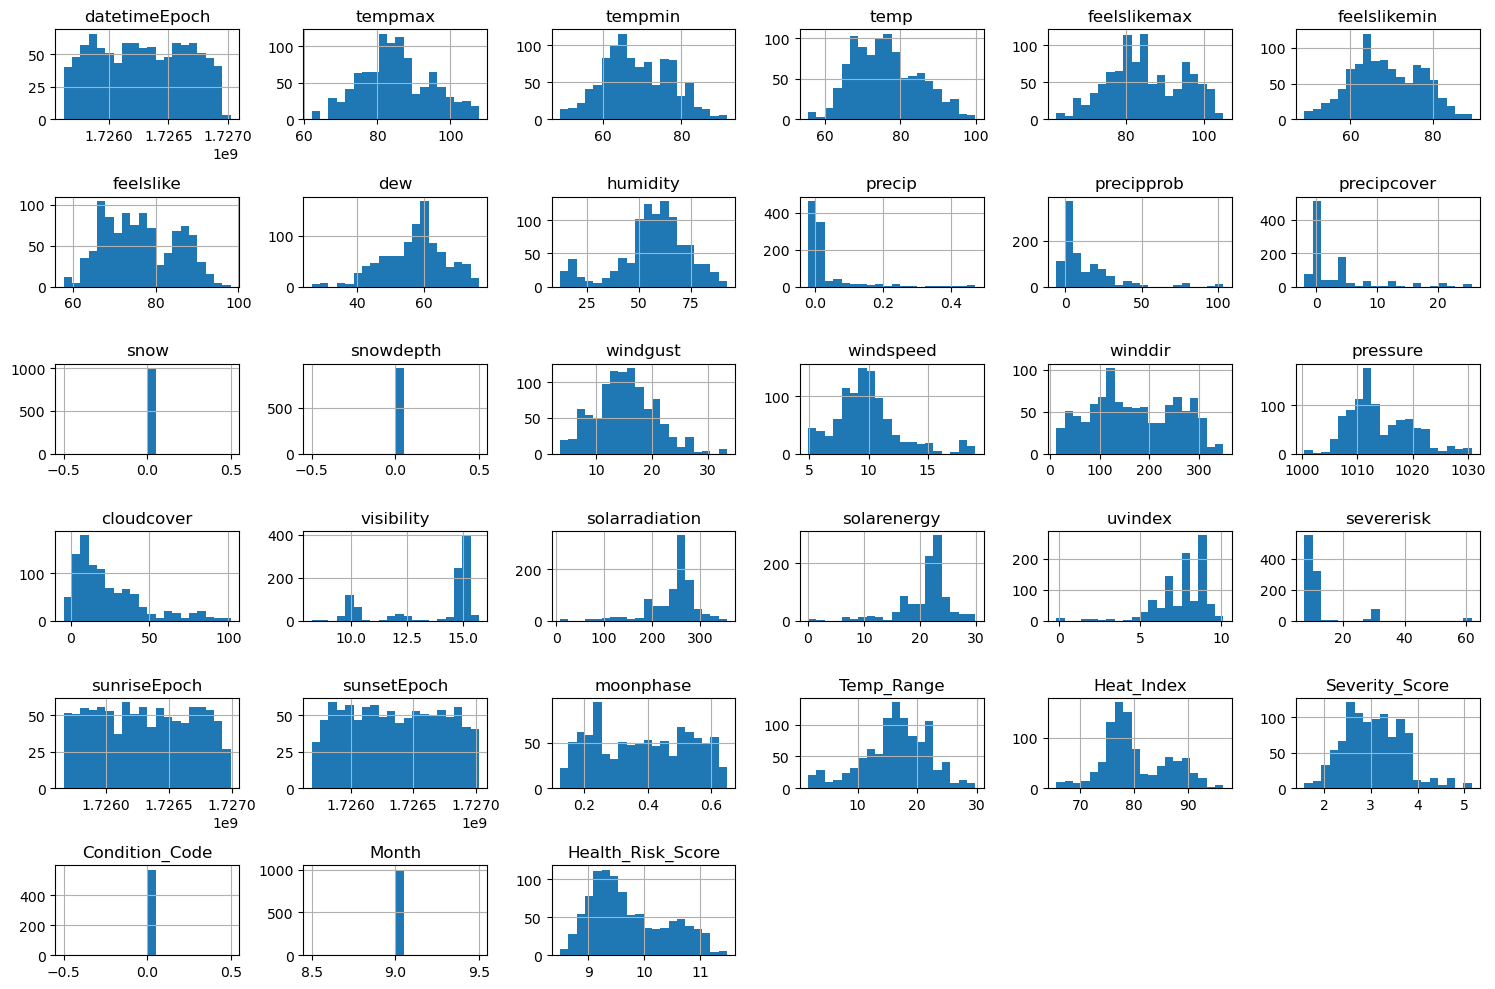

In [ ]:
#Visualization Techniques in Python
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

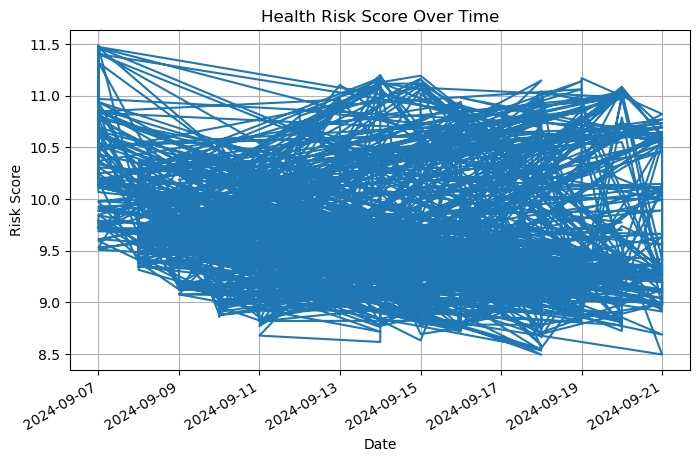

In [57]:
df['datetime'] = pd.to_datetime(df['datetime'])

plt.figure(figsize=(8, 5))
df.set_index('datetime')['Health_Risk_Score'].plot()
plt.title('Health Risk Score Over Time')
plt.ylabel('Risk Score')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [ ]:
#Plotly
fig = px.scatter(df, x='temp', y='Health_Risk_Score', color='City', size='humidity',hover_data=['datetime', 'conditions'],title="Temperature vs. Health Risk (Interactive)")
fig.show()

In [60]:
#Bokeh
df=pd.read_csv("Urban Air Quality and Health Impact Dataset.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
source = ColumnDataSource(df)

p = figure(width=1000, height=600, x_axis_type="datetime", 
           title="Urban Air Quality Metrics Over Time",
           tools="pan,wheel_zoom,box_zoom,reset,save")

metrics = ['Health_Risk_Score', 'temp', 'humidity', 'windspeed', 'pressure']
colors = Category10[len(metrics)]

for metric, color in zip(metrics, colors):
    p.line(x='datetime', y=metric, source=source, 
           line_width=2, color=color, alpha=0.8, legend_label=metric)
    
hover = HoverTool(
    tooltips=[
        ("Date", "@datetime{%F %H:%M}"),
        ("Health Risk", "@Health_Risk_Score{0.2f}"),
        ("Temperature", "@temp{0.1f} °C"),
        ("Humidity", "@humidity{0.1f}%"),
        ("Windspeed", "@windspeed{0.1f} mph"),
        ("Pressure", "@pressure{0.2f} hPa"),
        ("Conditions", "@conditions")
    ],
    formatters={
        '@datetime': 'datetime',  
    },
    mode='vline'
)
p.add_tools(hover)

span = Span(location=df['datetime'].median(), 
            dimension='height', line_color='red', line_dash='dashed')
p.add_layout(span)

range_slider = RangeSlider(start=df['datetime'].min().timestamp()*1000, 
                          end=df['datetime'].max().timestamp()*1000,
                          value=(df['datetime'].min().timestamp()*1000, 
                                 df['datetime'].max().timestamp()*1000),
                          step=86400000, title="Date Range")

p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Metric Values"
p.legend.location = "top_left"
p.legend.click_policy = "hide"  
p.title.text_font_size = "16pt"

# Display
output_notebook()
show(column(p, range_slider))

Loading BokehJS ...

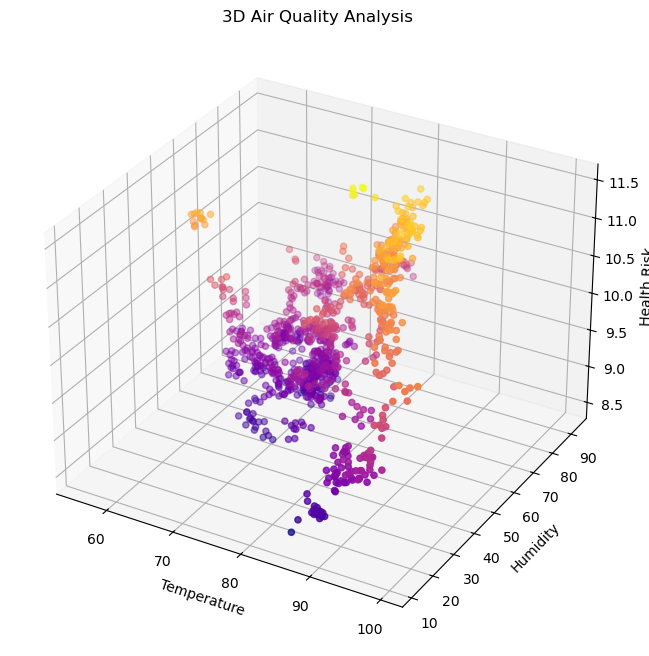

In [61]:
#3D scatter plot - Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['temp'], df['humidity'], df['Health_Risk_Score'], c=df['Health_Risk_Score'], cmap='plasma')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Health Risk')
plt.title("3D Air Quality Analysis")
plt.show()

In [62]:
#Interactive 3D Plot (Plotly)
fig = px.scatter_3d(df, x='temp', y='humidity', z='Health_Risk_Score',color='City', symbol='conditions',animation_frame='Month')
fig.update_layout(scene_zaxis_type="log")
fig.show()

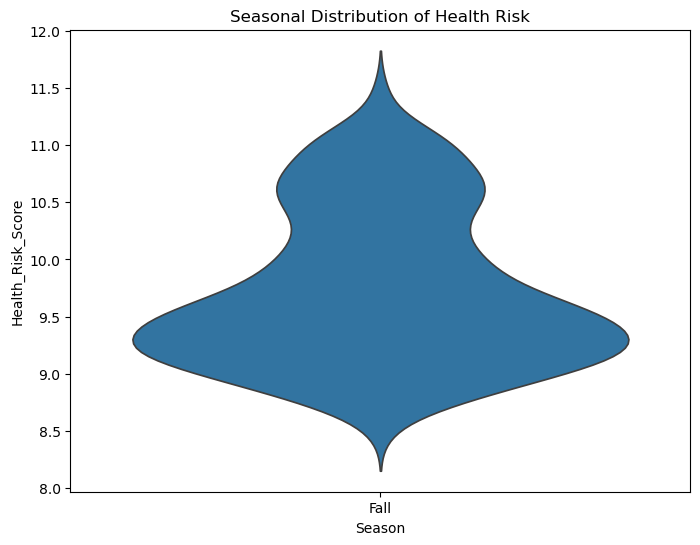

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Season', y='Health_Risk_Score', data=df, inner=None)
plt.title("Seasonal Distribution of Health Risk")
plt.show()

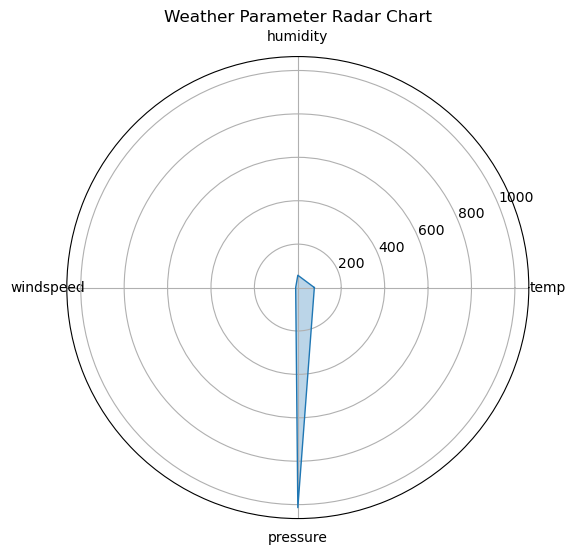

In [63]:
#Radar Chart - Matplotlib
from math import pi

categories = ['temp', 'humidity', 'windspeed', 'pressure']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
values = df[categories].mean().values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, alpha=0.3)
plt.xticks(angles[:-1], categories)
plt.title("Weather Parameter Radar Chart")
plt.show()

In [64]:
#Sunburst Chart (Plotly)
fig = px.sunburst(df, path=['Season', 'conditions'], values='Health_Risk_Score')
fig.show()